# Feedforward Neural Network with Back-Propagation
Do the following tasks in your program:
1. initialize all of the weights and biases
2. redefine your model by connecting the output of each layer to the input of the next layer
3. calculate the Logits (scores)
4. use a specific cross-entropy function to calculate loss using logits


Finally, analyse your results and try to answer the following questions:


### Questions
1. What is the maximum accuracy that you can get in each setting for running your model with 10000 iterations?
2. Is there a big difference between the convergence rate of the sigmoid and the ReLU? If yes, what is the reason for the difference?
3. What is the reason that we use the softmax in our output layer?
4. By zooming into the second half of the epochs in accuracy and loss plot, do you see any strange behaviour? What is the reason and how you can overcome them? (e.g., look at fluctuations or sudden loss increase after a period of decreasing loss).


### Answers
1. Maximum accuracy 
   sigmoid & softmax: ~97.7%
   ReLU & softmax: ~98.1%
2. ReLU converges after around 4 epochs, while sigmoid converges after around 10 to 15 epochs. Thus, there is a big difference between the two. ReLUs have their activation threshold at zero and their activation function is linear. Hence, they do not suffer from a vanishing gradient (derivative of the function is 1 for x > 0).
3. Softmax is used in the output layer as our classifier to handle multiple classes (i.e. logistic regression can only handle two classes). It assigns a summed up probability of 1 to all classes, whereby it will maximize the probability of a single class based on the previous layer and thus giving us a clear indicator, which number we are looking at.
4. There are changes in the accuracy for both models with around 0.6% for sigmoid and 1.5% for ReLU as well as changes in the loss function with around 4 for sigmoid and 8 for ReLU. When we are training and testing our set with SGD we are trying with every step to optimize our model. In this process the network starts to overfit to the training data and interprets noise as relationship to layers. We can overcome this by introducing e.g. L2 regularization, dropout or input noise. Regularization is quite common and gives a good option to improve the generalization of the network on test data.  

In [4]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data      

tf.set_random_seed(0)                                           

# load data, 60K trainset and 10K testset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## sigmoid

In [5]:
# 1. Define Variables and Placeholders
#the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y_ = tf.placeholder(tf.float32, [None, 10])

# Weights initialised with small random values between -0.2 and +0.2
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
B1 = tf.Variable(tf.zeros([200]))
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1))
B2 = tf.Variable(tf.zeros([100]))
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
B3 = tf.Variable(tf.zeros([60]))
W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1))
B4 = tf.Variable(tf.zeros([30]))
W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))
B5 = tf.Variable(tf.zeros([10]))

# 2. Define the model
XX = tf.reshape(X, [-1, 784])

# Y = tf.nn.softmax(tf.matmul(XX, W) + b)

Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

# 3. Define the loss function  
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(Ylogits, Y_) # calculate cross-entropy with logits
cross_entropy = tf.reduce_mean(cross_entropy)*100

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y_ * tf.log(Y), reduction_indices=[1]))

# 4. Define the accuracy 
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 5. Define an optimizer
train_step = tf.train.AdamOptimizer(0.005).minimize(cross_entropy)

In [6]:
# initialize
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [7]:
def training_step(i, update_test_data, update_train_data):

    print "\r", i,
    ####### actual learning 
    # reading batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={XX: batch_X, Y_: batch_Y})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: batch_X, Y_: batch_Y})
        train_a.append(a)
        train_c.append(c)

    if update_test_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={XX: mnist.test.images, Y_: mnist.test.labels})
        test_a.append(a)
        test_c.append(c)

    
    return (train_a, train_c, test_a, test_c)

In [8]:
# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc

9999


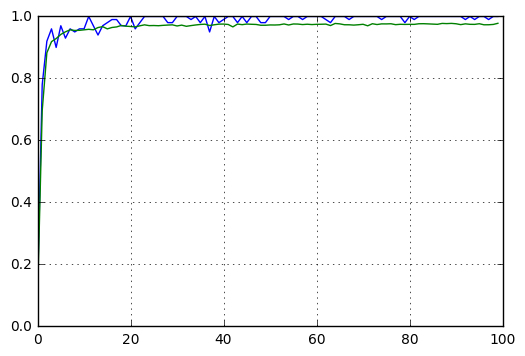

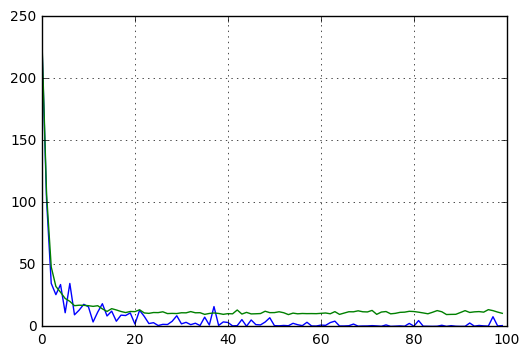

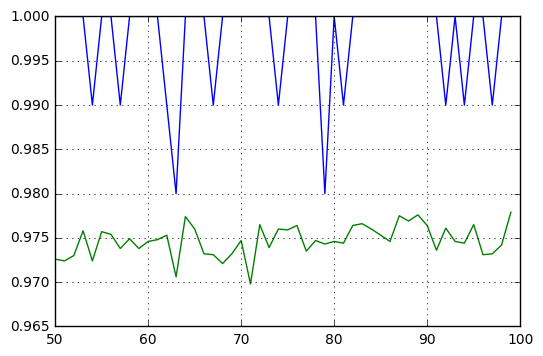

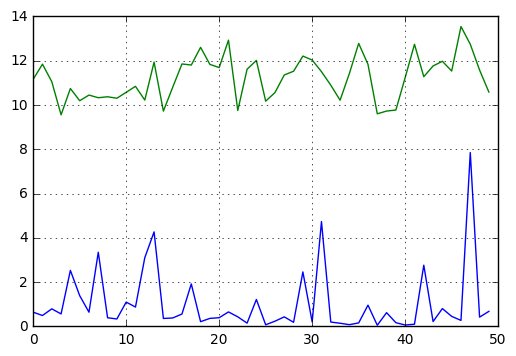

In [9]:
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a)
plt.plot(test_a)
plt.grid(True)
plt.show()

# loss training vs testing dataset
plt.plot(train_c)
plt.plot(test_c)
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter/epoch_size)
plt.plot(x_range, train_a[zoom_point:])
plt.plot(x_range, test_a[zoom_point:])
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:])
plt.plot(test_c[zoom_point:])
plt.grid(True)
plt.show()

## ReLU

In [11]:
# Weights initialised with small random values between -0.2 and +0.2
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
B1 = tf.Variable(tf.ones([200])/10)
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1))
B2 = tf.Variable(tf.ones([100])/10)
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
B3 = tf.Variable(tf.ones([60])/10)
W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1))
B4 = tf.Variable(tf.ones([30])/10)
W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))
B5 = tf.Variable(tf.ones([10]))


# 2. Define the model
XX = tf.reshape(X, [-1, 784])

# Y = tf.nn.softmax(tf.matmul(XX, W) + b)

Y1 = tf.nn.relu(tf.matmul(XX, W1) + B1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + B2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + B3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + B4)
Ylogits = tf.matmul(Y4, W5) + B5
Y = tf.nn.softmax(Ylogits)

# 3. Define the loss function  
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(Ylogits, Y_) # calculate cross-entropy with logits
cross_entropy = tf.reduce_mean(cross_entropy)*100

# cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y_ * tf.log(Y), reduction_indices=[1]))

# 4. Define the accuracy 
correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 5. Define an optimizer
train_step = tf.train.AdamOptimizer(0.005).minimize(cross_entropy)

In [12]:
# initialize
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [13]:
# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []
    
training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    test = False
    if i % epoch_size == 0:
        test = True
    a, c, ta, tc = training_step(i, test, test)
    train_a += a
    train_c += c
    test_a += ta
    test_c += tc

9999


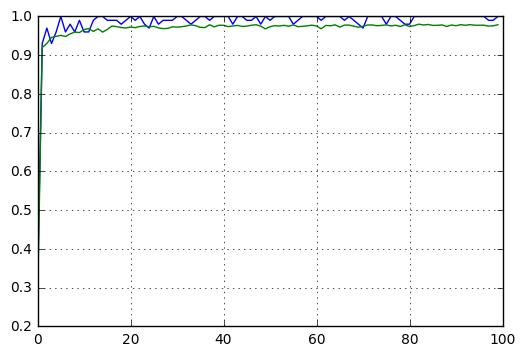

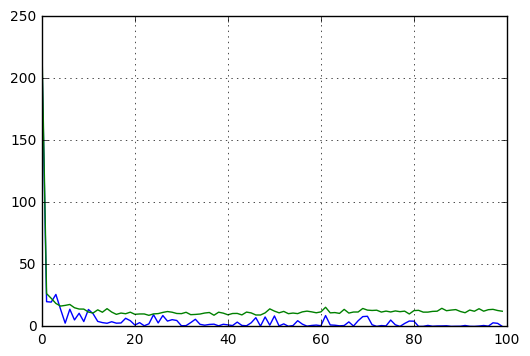

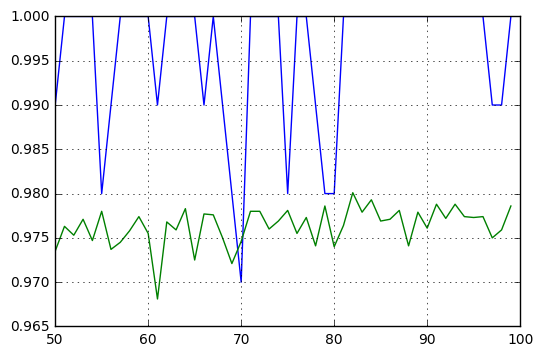

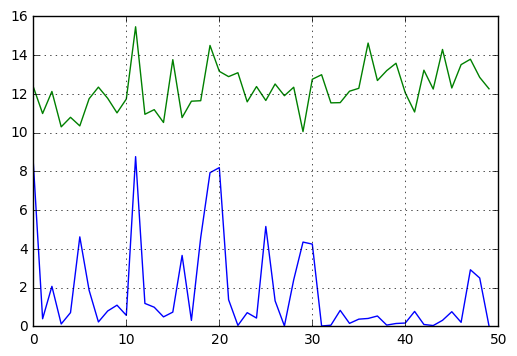

In [14]:
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a)
plt.plot(test_a)
plt.grid(True)
plt.show()

# loss training vs testing dataset
plt.plot(train_c)
plt.plot(test_c)
plt.grid(True)
plt.show()

# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter/epoch_size)
plt.plot(x_range, train_a[zoom_point:])
plt.plot(x_range, test_a[zoom_point:])
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:])
plt.plot(test_c[zoom_point:])
plt.grid(True)
plt.show()